In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve,fbeta_score,recall_score,precision_recall_fscore_support,accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
def load_data(file_path):
    return pd.read_csv(file_path)

credit_data = load_data('D:\\jyupter_notebooks\\Credit_Card_Defaulter\\Kaggle_Classification\\data\\UCI_Credit_Card.csv')
print(credit_data.head(1))
print(f'The shape of the dataframe is : {credit_data.shape}')

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  

[1 rows x 25 columns]
The shape of the dataframe is : (30000, 25)


In [5]:
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [3]:
credit_data.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default', 'MARRIAGE':'Marital Status'}, inplace = True)

In [4]:
def data_profile(credit_data):
    stats = []
    for col in credit_data.columns:
        stats.append((col, credit_data[col].nunique(),credit_data[col].isnull().sum(),credit_data[col].isnull().sum() * 100 / credit_data.shape[0],credit_data[col].dtype))

    stats_credit_data = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Total null values', 'Percentage of missing values', 'type'])
    stats_credit_data.sort_values('Percentage of missing values', ascending=True)
    return stats_credit_data

data_profile(credit_data)

,Feature,Unique_values,Total null values,Percentage of missing values,type
0,ID,30000,0,0.0,int64
1,LIMIT_BAL,81,0,0.0,float64
2,SEX,2,0,0.0,int64
3,EDUCATION,7,0,0.0,int64
4,Marital Status,4,0,0.0,int64
5,AGE,56,0,0.0,int64
6,PAY_1,11,0,0.0,int64
7,PAY_2,11,0,0.0,int64
8,PAY_3,11,0,0.0,int64
9,PAY_4,11,0,0.0,int64


In [11]:
df ={'ID': 1, 'LIMIT_BAL': '180000.0', 'SEX': 2, 'EDUCATION': 2, 'Marital Status': 1, 'AGE': 29, 'PAY_1': 0, 'PAY_2': 0, 'PAY_3': -1, 'PAY_4': 0, 'PAY_5': 0, 'PAY_6': 839.0, 'BILL_AMT1': 0, 'BILL_AMT2': 839.0, 'BILL_AMT3': 0, 'BILL_AMT4': 839.0, 'BILL_AMT5': 10, 'BILL_AMT6': 20, 'PAY_AMT1': 54.0, 'PAY_AMT2': 60.2, 'PAY_AMT3': 65.2, 'PAY_AMT4': 58.2, 'PAY_AMT5': 60.2, 'PAY_AMT6': 50.5}

In [18]:
import pandas as pd
df1 = pd.DataFrame(list(df.items()))
df1

,0,1
0,ID,1
1,LIMIT_BAL,180000.0
2,SEX,2
3,EDUCATION,2
4,Marital Status,1
5,AGE,29
6,PAY_1,0
7,PAY_2,0
8,PAY_3,-1
9,PAY_4,0


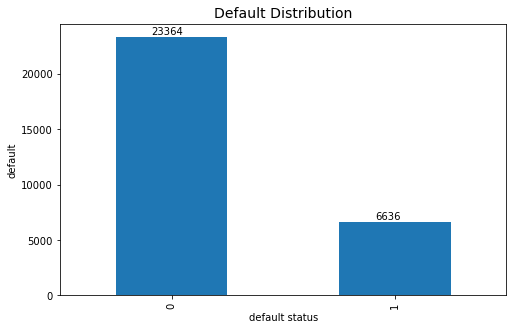

In [5]:
def show_target_value_dist(col):
    plt.figure(figsize=(8,5))
    ax = col.value_counts().plot(kind = 'bar')
    plt.ylabel('default')
    plt.xlabel('default status')
    plt.title('Default Distribution',fontsize=14)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+200))
    plt.show()
show_target_value_dist(credit_data['Default'])


In [6]:
def get_num_col(credit_data):
    num_col = []
    for col in credit_data.columns:
        if credit_data[col].dtype in [int,float]:
            num_col.append(col)
    return num_col

num_cols = get_num_col(credit_data)
num_cols

['LIMIT_BAL',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [7]:
def bi_variate(col,list1,list2):
    plt.figure(figsize=(12,4))
    ax = sns.countplot(data = credit_data, x = col, hue="Default")

    plt.xlabel(col, fontsize= 12)
    plt.ylabel("# of Customers", fontsize= 12)
    plt.ylim(0,20000)
    plt.xticks(list1, list2, fontsize = 11)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+200))

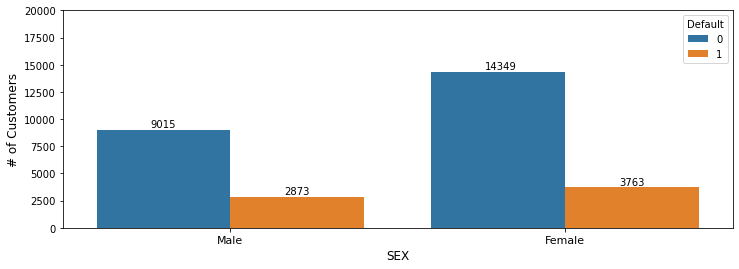

In [8]:
bi_variate('SEX',[0,1],['Male', 'Female'])

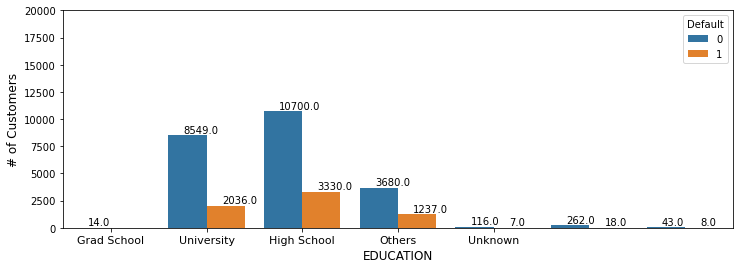

In [9]:
bi_variate('EDUCATION',[0,1,2,3,4],['Grad School','University','High School','Others','Unknown'])

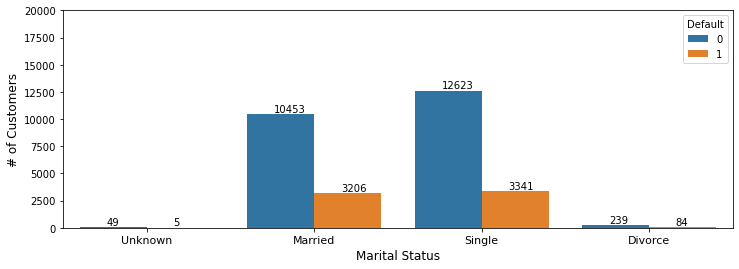

In [10]:
bi_variate('Marital Status',[0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'])

In [11]:
def multi_variate(col_1,col_2,list_1,list_2):
    plt.figure(figsize=(16,4))

    ax = sns.barplot(x = col_1, y = "Default", hue = col_2, data = credit_data, ci = None)

    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks(list_1,list_2, fontsize = 12)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

    plt.show()

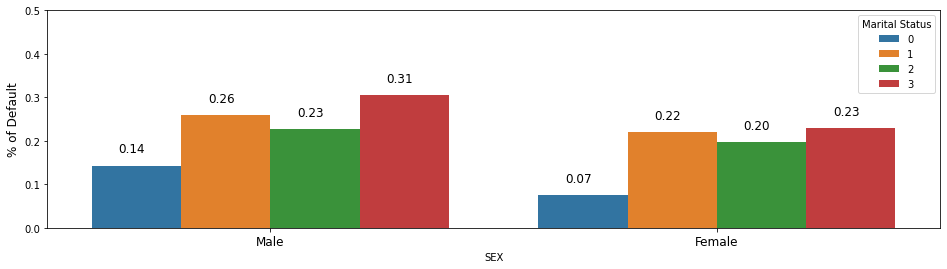

In [12]:
multi_variate('SEX','Marital Status',[0,1],['Male','Female'])

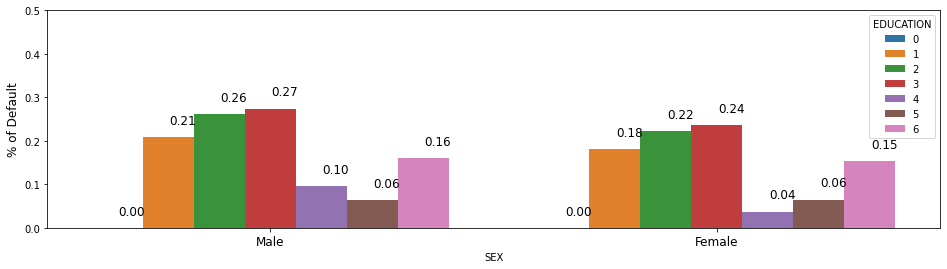

In [13]:
multi_variate('SEX','EDUCATION',[0,1],['Male','Female'])

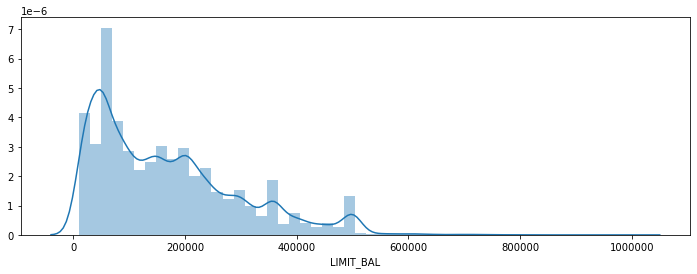

In [14]:
plt.figure(figsize=(12,4))
sns.distplot(credit_data['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

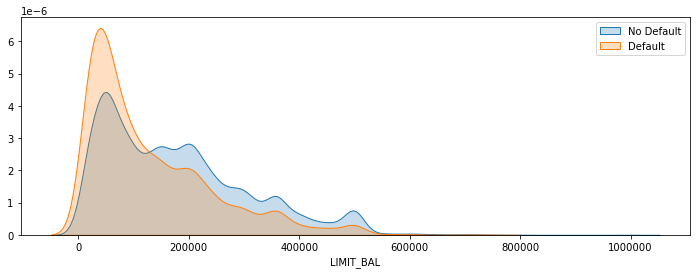

In [15]:
plt.figure(figsize=(12,4))

sns.kdeplot(credit_data.loc[(credit_data['Default']==0), 'LIMIT_BAL'], label='No Default', shade=True)
sns.kdeplot(credit_data.loc[(credit_data['Default']==1), 'LIMIT_BAL'], label='Default', shade=True)
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.legend()
plt.show()

In [16]:
credit_data['LimitBin'] = pd.cut(credit_data['LIMIT_BAL'],[5000,50000,100000,150000,200000,300000,400000,500000,1100000])
print(credit_data['LimitBin'].value_counts())
print(credit_data.head(1))

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64
   ID  LIMIT_BAL  SEX  EDUCATION  Marital Status  AGE  PAY_1  PAY_2  PAY_3  \
0   1    20000.0    2          2               1   24      2      2     -1   

   PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -1  ...        0.0        0.0       0.0     689.0       0.0       0.0   

   PAY_AMT5  PAY_AMT6  Default       LimitBin  
0       0.0       0.0        1  (5000, 50000]  

[1 rows x 26 columns]


In [17]:
credit_data['Default'].groupby(credit_data['LimitBin']).value_counts(normalize = True)

LimitBin           Default
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: Default, dtype: float64

In [18]:
credit_data.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,Marital Status,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,LimitBin
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(5000, 50000]"


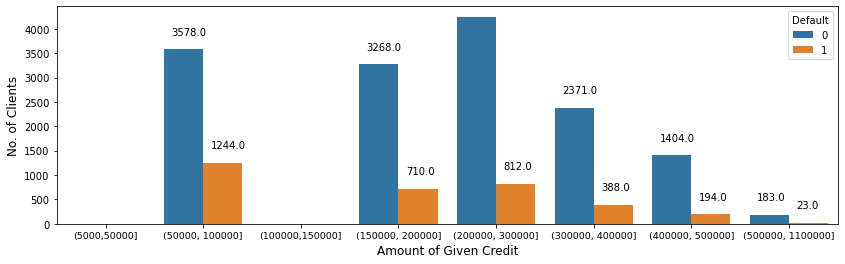

In [19]:
plt.figure(figsize=(14,4))

credit_data['LimitBin'] = credit_data['LimitBin'].astype('str')
LimitBin_order = ['(5000,50000]','(50000, 100000]','(100000,150000]','(150000, 200000]','(200000, 300000]','(300000, 400000]','(400000, 500000]','(500000, 1100000]']

ax = sns.countplot(data = credit_data, x='LimitBin', hue='Default', order=LimitBin_order)
plt.xlabel('Amount of Given Credit', fontsize=12)
plt.ylabel('No. of Clients', fontsize=12)
ax.tick_params(axis='x',labelsize=9.5)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))
plt.show()

<AxesSubplot:>

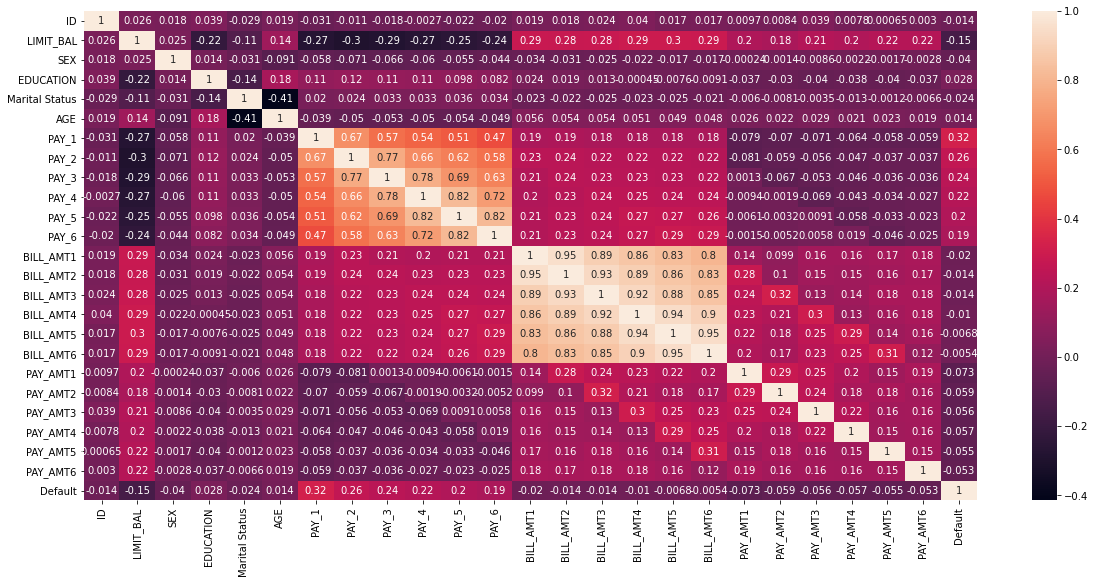

In [20]:
corr = credit_data.corr()

plt.figure(figsize = (20,9))
sns.heatmap(corr,annot = True,cmap = 'rocket')

In [21]:
bill_total = pd.DataFrame(credit_data['BILL_AMT1']+credit_data['BILL_AMT2']+credit_data['BILL_AMT3']+credit_data['BILL_AMT4']+credit_data['BILL_AMT5']+credit_data['BILL_AMT6'],columns=['bill_total'])
pay_amt_total = pd.DataFrame(credit_data['PAY_AMT1']+credit_data['PAY_AMT2']+credit_data['PAY_AMT3']+credit_data['PAY_AMT4']+credit_data['PAY_AMT5']+credit_data['PAY_AMT6'],columns=['pay_amt_total'])

In [22]:
total = pd.concat([pay_amt_total,bill_total],axis = 1)
total

,pay_amt_total,bill_total
0,689.0,7704.0
1,5000.0,17077.0
2,11018.0,101653.0
3,8388.0,231334.0
4,59049.0,109339.0
...,...,...
29995,42550.0,725349.0
29996,14490.0,21182.0
29997,31300.0,70496.0
29998,147181.0,266611.0


In [23]:
remaining_pay_balance =pd.DataFrame(total['bill_total']-total['pay_amt_total'],columns = ['remaining_pay_balance'])
remaining_pay_balance

,remaining_pay_balance
0,7015.0
1,12077.0
2,90635.0
3,222946.0
4,50290.0
...,...
29995,682799.0
29996,6692.0
29997,39196.0
29998,119430.0


In [24]:
X = credit_data.drop(['Default','LimitBin','ID'], axis=1)
y = credit_data['Default']

In [25]:
def train_test_val_split(X,y):
    X,X_test,y,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.25,random_state=42)

    return X_train,X_val,X_test,y_train,y_val,y_test

In [26]:
X_train,X_val,X_test,y_train,y_val,y_test = train_test_val_split(X,y)

In [27]:
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(18000, 23) (6000, 23) (6000, 23) (18000,) (6000,) (6000,)


In [28]:
def scale(X_train,X_val,X_test):
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train)
    X_val_scaled = sc.transform(X_val)
    X_test_scaled = sc.transform(X_test)

    return X_train_scaled,X_val_scaled,X_test_scaled

X_train_scaled,X_val_scaled,X_test_scaled = scale(X_train,X_val,X_test)

In [29]:
def model_score(model_name,model,X_train_scaled,X_val_scaled,X_test_scaled,y_train,y_val,y_test,test=True):

    my_model = model
    my_model.fit(X_train_scaled,y_train)
    my_model_y_pred = my_model.predict(X_val)
    print("Calculating validation score...")
    print(f'{model_name} accuracy score: {my_model.score(X_val_scaled,y_val)}')
    #print(f'accuarcy score is : {accuracy_score(y_val,my_model_y_pred)}')

    if test:
        print("Calculating test score...")
        print(f'{model_name} accuracy score: {my_model.score(X_test_scaled,y_test):.4}\n')

    return my_model


In [30]:
knn = model_score('KNN', KNeighborsClassifier(n_neighbors=5),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

lr = model_score('LogReg', LogisticRegression(penalty='none'),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

rf = model_score('RF', RandomForestClassifier(),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)
        
gbm = model_score('XGBoost', xgb.XGBClassifier(),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

svc = model_score('SVM', SVC(probability=True),
                       X_train_scaled,X_val_scaled, X_test_scaled,
                       y_train, y_val, y_test,test=False)

Calculating validation score...
KNN accuracy score: 0.7956666666666666
Calculating validation score...
LogReg accuracy score: 0.8148333333333333
Calculating validation score...
RF accuracy score: 0.8191666666666667
[14:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Calculating validation score...
XGBoost accuracy score: 0.8123333333333334
Calculating validation score...
SVM accuracy score: 0.8186666666666667


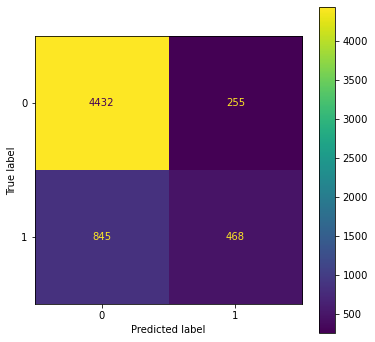

In [31]:
fig, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(rf, X_test_scaled, y_test, ax=ax)

In [32]:
y_preds_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



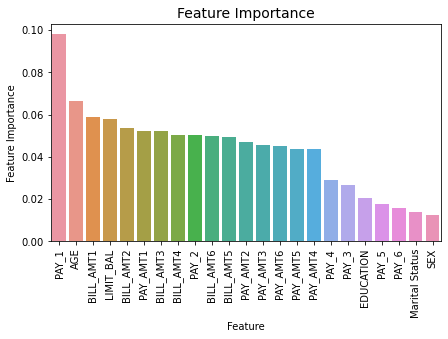

In [33]:
temp = pd.DataFrame({'Feature': list(X.columns), 'Feature Importance': rf.feature_importances_})
temp = temp.sort_values(by="Feature Importance", ascending=False)

plt.figure(figsize=(7,4))
plt.title('Feature Importance', fontsize=14)
s=sns.barplot(x='Feature', y='Feature Importance', data=temp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [34]:
# Update dataframe
#X = X.iloc[:, np.argsort(rf.feature_importances_,)[7:]]

In [35]:
bootstrap = [True, False]
max_features = ['auto','sqrt']
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
n_estimators = [50,100,150,200]
max_depth = [4,6,10,12, None]

In [36]:
param_dist = dict(n_estimators=n_estimators, max_depth = max_depth, bootstrap=bootstrap,
                  min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,
                  max_features=max_features)
print(param_dist)

{'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 6, 10, 12, None], 'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [37]:
rand = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=10, scoring='accuracy',
                          n_iter=10, random_state=42)
rand.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 6, 10, 12, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [38]:
def get_best_model(model_grid):
    best_k = model_grid.cv_results_['rank_test_score'][0]
    print (f"Mean score: {model_grid.cv_results_['mean_test_score'][best_k]}",
           f"Std: {model_grid.cv_results_['std_test_score'][best_k]}")

In [39]:
print(rand.best_score_)
print(rand.best_params_)
get_best_model(rand)

0.8203888888888888
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Mean score: 0.8198888888888888 Std: 0.007221367470787512


In [40]:
def over_under_sample(X_train, y_train, Under=True, Over=True):
    """
    Input: training features and target
    Output: under/oversampled datasets
    """
    rus = RandomUnderSampler(random_state=42)
    ros = RandomOverSampler(random_state=42)

    if Under and Over:
        X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
        X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
        return X_train_under, y_train_under, X_train_over, y_train_over
    elif Under:
        X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
        return X_train_under, y_train_under
    else:
        X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
        return X_train_over, y_train_over

In [54]:
print(X_train.head())

       LIMIT_BAL  SEX  EDUCATION  Marital Status  AGE  PAY_1  PAY_2  PAY_3  \
13142   180000.0    2          2               1   29      0      0     -1   
12541   290000.0    1          1               1   38      2      2      0   
26076    90000.0    2          2               1   34      1      2      2   
20167   200000.0    2          2               2   31     -2     -2     -2   
26304    90000.0    2          1               2   29      0      0      0   

       PAY_4  PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
13142      0      0  ...      839.0     1557.0    51680.0    53115.0   
12541      0      0  ...   297386.0   243558.0   241765.0   236413.0   
26076     -1     -1  ...        0.0     9281.0        0.0      340.0   
20167     -2     -2  ...      218.0     4360.0        0.0        0.0   
26304      0      0  ...    10220.0    12044.0    27847.0     8251.0   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
13142    2000.0     839.0     

In [41]:
# Split data
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_split(X, y)

# Random under/over sampling
X_train_under, y_train_under, X_train_over, y_train_over = over_under_sample(X_train, y_train, Under=True, Over=True)

In [42]:
# Scale
X_train_scaled_under, X_val_scaled, X_test_scaled = scale(X_train_under, X_val, X_test)

# Score
rf_under = model_score('RF', RandomForestClassifier(**rand.best_params_),
                 X_train_scaled_under, X_val_scaled, X_test_scaled,
                 y_train_under, y_val, y_test, test=False)

Calculating validation score...
RF accuracy score: 0.7555


In [43]:
y_preds = rf_under.predict(X_test_scaled)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4687
           1       0.45      0.65      0.53      1313

    accuracy                           0.75      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.75      0.76      6000



In [44]:
# Scale
X_train_scaled_over, X_val_scaled, X_test_scaled = scale(X_train_over, X_val, X_test)

# Score
rf_over = model_score('RF', RandomForestClassifier(**rand.best_params_),
                 X_train_scaled_over, X_val_scaled, X_test_scaled,
                 y_train_over, y_val, y_test, test=False)

Calculating validation score...
RF accuracy score: 0.7878333333333334


In [45]:
# Classification report
y_preds = rf_over.predict(X_test_scaled)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4687
           1       0.50      0.57      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.69      6000
weighted avg       0.79      0.78      0.79      6000



In [46]:
print("Random Forest with the following parameters:\n")
print(rand.best_params_)

Random Forest with the following parameters:

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


Model validation on test data

In [47]:
X = credit_data.drop(['Default','LimitBin','ID'], axis=1)
y = credit_data['Default']

In [48]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_val_split(X,y)

X_train_scaled, X_val_scaled, X_test_scaled = scale(X_train, X_val, X_test)

rf = model_score('RF', RandomForestClassifier(**rand.best_params_),X_train_scaled,X_val_scaled,X_test_scaled,y_train,y_val,y_test, test=True)

Calculating validation score...
RF accuracy score: 0.8206666666666667
Calculating test score...
RF accuracy score: 0.8197



ROC AUC score =  0.7735113781519787


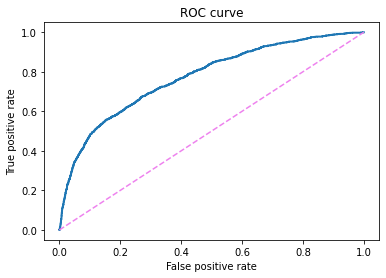

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, rf_over.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, rf_over.predict_proba(X_test_scaled)[:,1]))

In [50]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf_over, open(filename, 'wb'))